<h1>Imports</h1>

In [1]:
import numpy as np
import matplotlib as plt

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

<h1>Data</h1>

(3L, 100L)
(3L,)


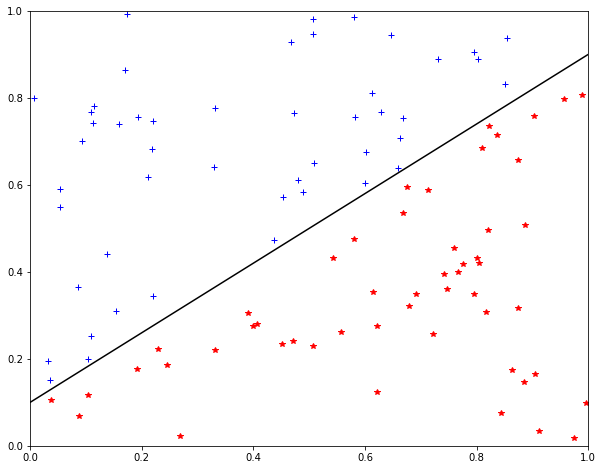

In [124]:
w_1 = 8.0 #w_1
w_2p = 10.0 #w_2'

m = w_1/w_2p
c = 0.1

w_0 = w_2p*c
w_2 = -w_2p

w_true = np.array([w_0, w_1, w_2])

N = 100

x = np.random.rand(3,N)
x[0,:] = 1

print x.shape #should print (3L, 10L) [windows] or (3,10) [linux] showing 3x10 matrix
print w_true.shape #should pring (3L,) [windows] or (3,) [linux] showing 3x1 matrix
#note that it is row vector instead or column

#now let us compute the labels
y_true = (w_true.dot(x)>0)*1.0+(w_true.dot(x)<=0)*-1.0

marker = {}
marker[-1.0] = '+b'
marker[1.0] = '*r'

marker2 = {}
marker2[-1.0] = 'Pg'
marker2[1.0] = 'Dm'



x_1__ = np.arange(0,1.0,0.001)
x_2__ = m*x_1__+c #the line that separates the classes

def data_plot(x_1__,x_2___, x,y_true, marker, x2=None, y2_true=None, marker2=None):
    for i in range(len(y_true)):
        plt.plot(x[1,i],x[2,i],marker[y_true[i]])
    if x2 is not None:
        for i in range(len(y2_true)):
            plt.plot(x2[1,i],x2[2,i],marker2[y2_true[i]])
    plt.plot(x_1__,x_2__,'-k')
    plt.xlim([0,1.0])
    plt.ylim([0,1.0])

    plt.show()

data_plot(x_1__,x_2__,x,y_true,marker)
#you should see a perfectly separed data

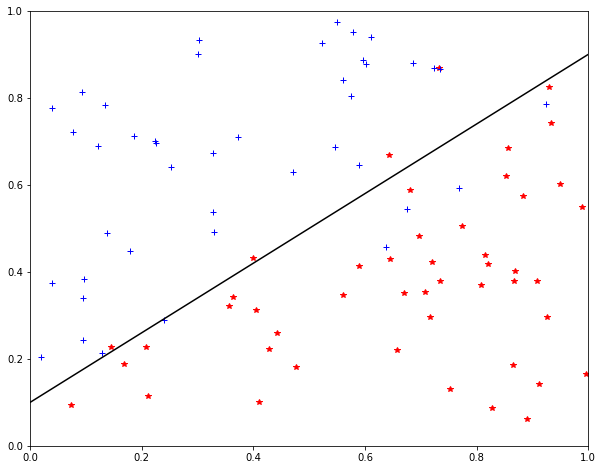

In [126]:
x2 = x.copy()
x2[1:,:] += 0.1*np.random.randn(2,N)

data_plot(x_1__,x_2__,x2,y_true,marker)

<h1>K-Nearest Neighbor</h1>

In [116]:
from scipy.stats import mode

class KNN():
    def train(self,K,x_tr,y_tr):
        self.X = x_tr
        self.Y = y_tr
        self.K = K
        return
    def test(self,x):
        _,N = x.shape
        y = np.zeros(N)
        for i in range(N):
            kn = np.argsort(np.sum(np.square(x[:,i]-self.X.T),axis=1))
            kn = kn[:self.K]
            y[i] = mode(self.Y[kn])[0]
            
        return y
        

[-1. -1.  1.]


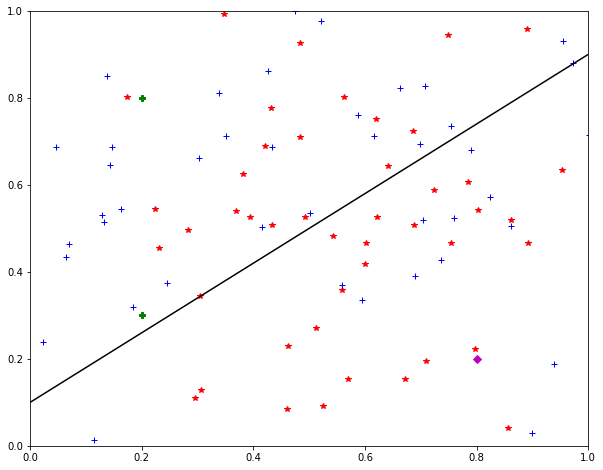

In [125]:
knn = KNN()
x_train = x2[1:,:]
knn.train(5,x_train,y_true)

x_test = np.array([[1, 1, 1], [0.2, 0.2, 0.8], [0.3, 0.8, 0.2]])

y_test = knn.test(x_test[1:,:])

print y_test

data_plot(x_1__,x_2__,x2,y_true,marker,x_test,y_test,marker2)

<h1>K Means Clustering</h1>

In [141]:
#Lloyd Algorithm
class KMEANS():
    def train(self,K,x_tr,delta=10**-6):
        d,N = x_tr.shape
        m = np.random.rand(d,K)
        m_old = m.copy()
        S = np.zeros((N))
        it = 0
        while(True):
            for i in range(N):
                S[i] = np.argmin(np.sum(np.square(m.T-x_tr[:,i]),axis=1))
            for i in range(d):
                m[:,i] = np.mean(x_tr[:,S==i],axis=1)
            if np.sum(np.square(m-m_old))<delta:
                break;
            m_old = m.copy()
            it += 1
        self.m = m
        print "Total Iteration to converge:", it
    def test(self,x):
        _,N = x.shape
        S = np.zeros(N)
        for i in range(N):
            S[i] = np.argmin(np.sum(np.square(m.T-x[:,i]),axis=1))
        return S
    


Total Iteration to converge: 10
2 5
[[ 0.29627049  0.65813778  0.20940897  0.84185442  0.88729632]
 [ 0.76406353  0.49219559  0.36538582  0.82496484  0.12750661]] [-1. -1. -1. -1. -1.]
X: 
[[ 0.2  0.2  0.8]
 [ 0.3  0.8  0.2]]
S:  [ 2.  0.  4.]


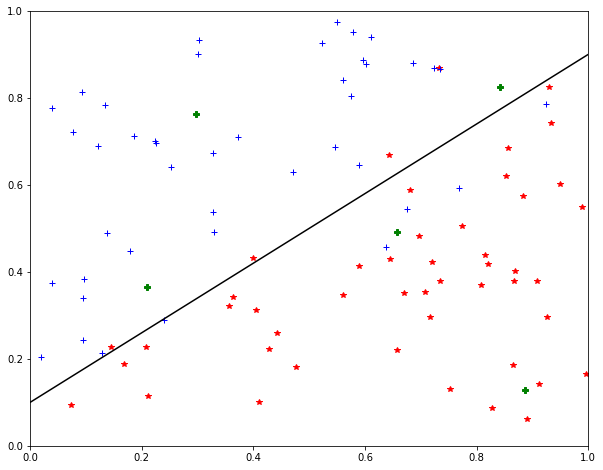

In [142]:
kmu = KMEANS()
kmu.train(5,x_train)
m = kmu.m
d,N = m.shape
print d,N
m_y = np.ones((N))*-1
print m, m_y

S = kmu.test(x_test[1:,:])
print 'X: '
print x_test[1:,:]
print 'S: ', S

m_x = np.concatenate((np.ones((1,N)), m),axis=0)

data_plot(x_1__,x_2__,x2,y_true,marker,m_x,m_y,marker2)